<a href="https://colab.research.google.com/github/gawankarsanket/premierServiceEligibilty_usingDecisionTree/blob/main/Classifier_for_premierServiceEligibilty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Classifier for premierServiceEligibilty

FoxCon Solution (Dummy Name) provides cloud-hosted Dialer services to small and medium-sized businesses (SMBs) to run their contact centers. FoxCon offers two types of dialer services: Regular and Premier, which include additional API call limits, discounts, and promotional features.

The contact centers at these SMBs generate API calls to FoxCon's cloud-hosted dialers, which then connect the calls to their respective leads.

The objective of this project is to analyze the past quarter's usage report and identify potential customers for Premier Service. The criteria for eligibility for Premier Service are that the SMB should have generated more than 1000 API calls in the last quarter and should have been in service for the past 6 years.

There are also Tier1 customers who have already been identified as Premier Service eligible and will remain as such.

This classification report will help FoxCon's business development team target SMBs for further offerings, aiming to retain and encourage increased usage of the service.



## Machine Learning

We will use Decision Tree Classifier, the simple but yet effective model to classify this reprt.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Downalod dataset from GitHub

In [ ]:
# Clone the repository
!git clone https://github.com/gawankarsanket/premierServiceEligibilty_usingDecisionTree.git

Cloning into 'premierServiceEligibilty_usingDecisionTree'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 1.42 MiB | 2.02 MiB/s, done.


In [ ]:
# Copy dataset to  Content folder
!cp  /content/premierServiceEligibilty_usingDecisionTree/dataset.json  /content/dataset.json

In [ ]:
df=pd.read_json("/content/dataset.json",lines=True)

In [ ]:
df.head(10)

,CustID,usageCount,Tier1Cust,premierlastActivated,premierServiceEligible
0,eipk200001,602,Yes,04-2019,Yes
1,eipk200002,935,Yes,04-2018,Yes
2,eipk200003,848,Yes,01-2021,Yes
3,eipk200004,770,Yes,09-2020,Yes
4,eipk200005,606,Yes,07-2020,Yes
5,eipk200006,571,Yes,07-2019,Yes
6,eipk200007,688,Yes,02-2019,Yes
7,eipk200008,520,Yes,02-2024,Yes
8,eipk200009,602,Yes,12-2018,Yes
9,eipk200010,621,Yes,09-2022,Yes


## Dataset to be arraged as follows

### usageCount	 :  Numeric type. No need to change
### Tier1Cust  : Object type . Need OHE
### premierLastActived : Here we need to calculate value in terms of total number of month since inception of service  till June 2024 (current month)

#### premierSericeEligible :  Label encoding to be done



In [ ]:
df.shape

(100417, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100417 entries, 0 to 100416
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CustID                  100417 non-null  object
 1   usageCount              100417 non-null  int64 
 2   Tier1Cust               100417 non-null  object
 3   premierlastActivated    100417 non-null  object
 4   premierServiceEligible  100417 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df['premierServiceEligible'].value_counts()  # Dataset it balanced.

premierServiceEligible
Yes    50264
No     50153
Name: count, dtype: int64

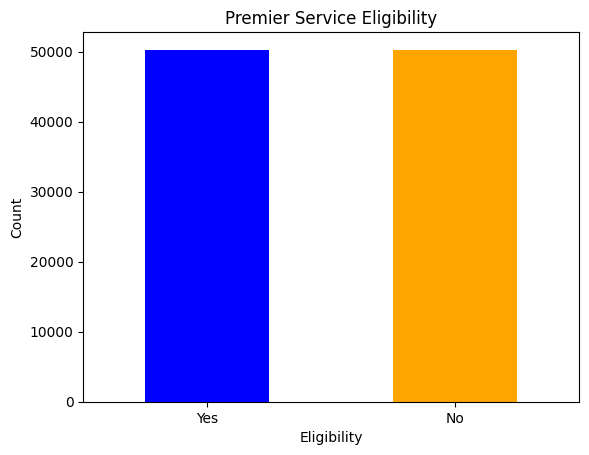

In [ ]:
value_counts = df['premierServiceEligible'].value_counts()

# Plotting the bar graph
value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Premier Service Eligibility')
plt.xlabel('Eligibility')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotate x-axis labels to horizontal

# Show the plot
plt.show()

## Divide dataset in train and test. (not xtrain ytrain now. This is real test data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=7)

train_df.shape,test_df.shape

((80333, 5), (20084, 5))

## Prepare train_df for ML fitting

In [ ]:
#Function for Label encoding on target
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

def LabelEnconding_target(y):
  y=LE.fit_transform(y)
  return y


In [ ]:
#Applying LabelEncoder on Target variable
train_df['premierServiceEligible']=LabelEnconding_target(train_df['premierServiceEligible'])
train_df.head(3)

,CustID,usageCount,Tier1Cust,premierlastActivated,premierServiceEligible
1888,eipk201889,749,Yes,07-2023,1
21452,eipk221453,594,No,09-2021,0
31275,eipk231276,690,No,08-2018,0


In [ ]:
#Function for OHE (Tier1Cust)

def apply_OHE(df):
  df=pd.get_dummies(df, columns=['Tier1Cust'], prefix='Tier1Cust')
  return df


In [ ]:
# Apply OHE in dataframe
train_df=apply_OHE(train_df)
train_df.head(3)

,CustID,usageCount,premierlastActivated,premierServiceEligible,Tier1Cust_No,Tier1Cust_Yes
1888,eipk201889,749,07-2023,1,False,True
21452,eipk221453,594,09-2021,0,True,False
31275,eipk231276,690,08-2018,0,True,False


In [ ]:
def total_months(date, max_date):
  return ((max_date.year - date.year) * 12 + max_date.month - date.month)

In [ ]:
#Funtion for calculating total number of month since inception

def calculate_total_months(dataframe):
  dataframe['premierlastActivated'] = pd.to_datetime(dataframe['premierlastActivated'], format='%m-%Y') #Convert in date and time format
  max_date = dataframe['premierlastActivated'].max()
  dataframe['monthsSinceLastActivated'] = dataframe['premierlastActivated'].apply(lambda date: total_months(date, max_date))
  return dataframe



In [ ]:
calculate_total_months(train_df)

,CustID,usageCount,premierlastActivated,premierServiceEligible,Tier1Cust_No,Tier1Cust_Yes,monthsSinceLastActivated
1888,eipk201889,749,2023-07-01,1,False,True,10
21452,eipk221453,594,2021-09-01,0,True,False,32
31275,eipk231276,690,2018-08-01,0,True,False,69
32066,eipk232067,685,2020-11-01,0,True,False,42
46666,eipk246667,806,2023-11-01,0,True,False,6
...,...,...,...,...,...,...,...
53459,eipk253460,603,2023-03-01,0,True,False,14
10742,eipk210743,940,2022-09-01,0,True,False,20
49689,eipk249690,926,2019-02-01,0,True,False,63
58564,eipk258565,616,2018-01-01,0,True,False,76


In [ ]:
train_df['monthsSinceLastActivated'].max(),train_df['monthsSinceLastActivated'].min()

(76, 0)

# Now we have data in numeric fomat to feed in for ML

## now will devide in xtrain ytrain

In [ ]:
train_df.columns

Index(['CustID', 'usageCount', 'premierlastActivated',
       'premierServiceEligible', 'Tier1Cust_No', 'Tier1Cust_Yes',
       'monthsSinceLastActivated'],
      dtype='object')

In [ ]:
x=train_df[['usageCount','monthsSinceLastActivated','Tier1Cust_No','Tier1Cust_Yes']]
y=train_df[['premierServiceEligible']]

In [ ]:
# xtrain  & ytrain
# xtest & ytest


xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state=7)



# NOTE" Sequence of x_train x_test, y_train y_test is fixed.
#test_size 0.1  means test data 10%
# meaning training data 90%

## Building Decision Tree Classifier using Entropy as a Criterion

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [ ]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=5)

model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.6, 0.8333333333333334, 'x[0] <= 999.5\nentropy = 1.0\nsamples = 72299\nvalue = [36034, 36265]'),
 Text(0.4, 0.5, 'x[3] <= 0.5\nentropy = 0.652\nsamples = 43296\nvalue = [36034, 7262]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 36034\nvalue = [36034, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 7262\nvalue = [0, 7262]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 29003\nvalue = [0, 29003]')]

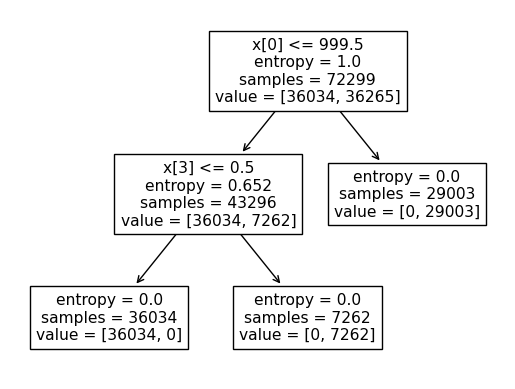

In [ ]:
tree.plot_tree(model)

In [ ]:
preds = model.predict(xtest)

In [ ]:
pd.crosstab(ytest['premierServiceEligible'],preds)

col_0,0,1
premierServiceEligible,,
0,4065,0
1,0,3969


In [ ]:
np.mean(preds==ytest['premierServiceEligible'])

1.0